In [7]:
# General import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random 

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

#sklearn import
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB

# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns


# Parameters and import data

In [2]:
# parameters
n_eye_positions = 25
subject = 'sub-001'

# defind data directory 
project_dir = '/home/ulascombes/disks/meso_shared/gaze_exp'
pp_dir = '{}/derivatives/pp_data'.format(project_dir)
df_fn = "{}/{}/desu".format(pp_dir,subject)

# tsv names
df_name_GazeLines ='df_task_GazeLines_runs.tsv'
df_name_GazeColumns ='df_task_GazeColumns_runs.tsv'

# import datas 
df_gazelines =pd.read_table('{}/{}'.format(df_fn,df_name_GazeLines))
df_gazecolumns =pd.read_table('{}/{}'.format(df_fn,df_name_GazeColumns))

### drop 3 first TRs
df_gazelines = df_gazelines.drop(df_gazelines.index[:3]).reset_index(drop=True)
df_gazecolumns = df_gazecolumns.drop(df_gazecolumns.index[:3]).reset_index(drop=True)

# Make an object with eye poisitions on gazelines runs

In [3]:
positions = []
for i in range(n_eye_positions):
    a = i +1
    b = i +1
    positions.append(a)
    positions.append(b)
positions_reverse = sorted(positions, reverse=True)

positions_0 = np.concatenate((positions,positions_reverse[2:]))
gazelines_position = np.concatenate((positions_0,positions_0[2:]))

# Brouillon

# KNN

In [4]:
features = np.array(df_gazelines)
labels = np.array(gazelines_position)

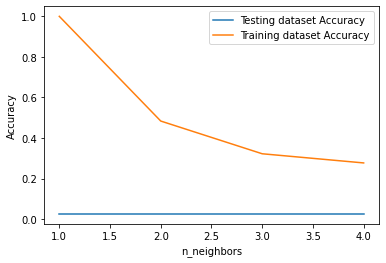

In [76]:



features_train0, features_test0, labels_train0, labels_test0 = train_test_split( 
              features, labels, test_size = 0.2, random_state=42) 

neighbors = np.arange(1, 5) 
  
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(features_train0, labels_train0) 
      
    
    train_accuracy[i] = knn.score(features_train0, labels_train0) 
    test_accuracy[i] = knn.score(features_test0, labels_test0) 
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()

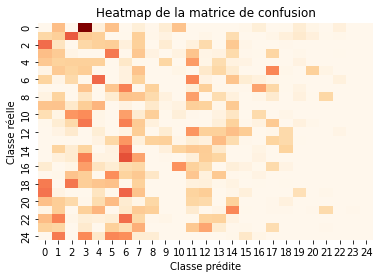

In [87]:
prediction_allrun=[]
labels_allrun=[]
for run in range(1000):
    
    features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.20, random_state=run)
    #features_train, features_test, labels_train, labels_test = train_test_split( random_features,random_labels, test_size=0.20, random_state=run)

    
    
    knn = KNeighborsClassifier(n_neighbors = 2).fit(features_train, labels_train)
    #accuracy = knn.score(features_train, labels_train)
    #print("Précision entrainement:", accuracy)
    
    pred_pop=knn.predict(features_test)
    
    # print(knn.predict(features_test))
    
    prediction_allrun.extend(pred_pop.tolist())    
    labels_allrun.extend(labels_test)    

cm = confusion_matrix(y_true=labels_allrun, y_pred=prediction_allrun, normalize='true')

# Afficher la heatmap de la matrice de confusion
sns.heatmap(cm, annot=False, cmap='OrRd', cbar=False)
plt.title('Heatmap de la matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()




# Bayesian

In [5]:
features = np.array(df_gazelines)
labels = np.array(gazelines_position)

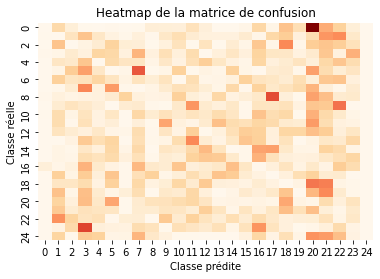

In [8]:

prediction_allrun=[]
labels_allrun=[]

for run in range(1000):
    
    features_train, features_test, labels_train, labels_test = train_test_split( features,labels, test_size=0.20, random_state=run)

    gnb = GaussianNB()

    pred_pop = gnb.fit(features_train, labels_train).predict(features_test)

    
    
    prediction_allrun.extend(pred_pop.tolist())    
    labels_allrun.extend(labels_test)    

cm = confusion_matrix(y_true=labels_allrun, y_pred=prediction_allrun, normalize='true')

# Afficher la heatmap de la matrice de confusion
sns.heatmap(cm, annot=False, cmap='OrRd', cbar=False)
plt.title('Heatmap de la matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()



In [10]:
features_train, features_test, labels_train, labels_test = train_test_split( features,labels, test_size=0.20, random_state=run)

model = GaussianNB()

model.fit(features_train, labels_train)

model.score(features_test,labels_test)

0.0

In [14]:
n_neighbors = np.arange(1, 100) 

score =[]
for i, n_neighbor in enumerate(n_neighbors):
    features_train, features_test, labels_train, labels_test = train_test_split( features,labels, test_size=0.20, random_state=run)

    model2 = KNeighborsClassifier(n_neighbors = n_neighbor).fit(features_train, labels_train)

    model2.fit(features_train, labels_train)

    a = model2.score(features_test,labels_test)
    score.append(a)

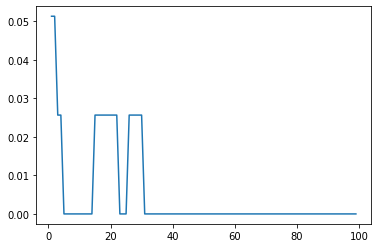

In [15]:
plt.plot(n_neighbors,score)

In [17]:
from sklearn.svm import LinearSVC

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=run)

# Initialisation du modèle LinearSVC
model = LinearSVC()

# Entraînement du modèle sur le train set
model.fit(features_train, labels_train)

# Évaluation de la performance du modèle sur le test set
accuracy = model.score(features_test, labels_test)
print("Précision du modèle : {:.2f}".format(accuracy))

Précision du modèle : 0.05


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Supposons que vous ayez déjà les données features et labels

# Split des données en train et test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=run)

# Initialisation du modèle LinearSVC
model = LinearSVC()

# Définition de la grille des hyperparamètres à explorer
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Valeurs de l'hyperparamètre C à explorer
    'penalty': ['l1', 'l2'],       # Méthode de régularisation (l1 ou l2)
    'dual': [False],               # Paramètre spécifique de LinearSVC (défini sur False pour des problèmes non duaux)
}

# Recherche des meilleures combinaisons d'hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)  # cv = nombre de folds pour la validation croisée

# Entraînement du modèle avec la recherche des hyperparamètres
grid_search.fit(features_train, labels_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Évaluation de la performance du modèle avec les meilleurs hyperparamètres sur le test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(features_test, labels_test)
print("Précision du modèle avec les meilleurs hyperparamètres : {:.2f}".format(accuracy))


In [ ]:
model = NomDuModele(parametres,hypermarametres)
model.fit(X_train,y_train) # apprentissage supervisé
model.fit(X_train)